In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## EDA

In [9]:
import pandas as pd
train_df = pd.read_csv('UNSW_NB15_training-set.csv')
train_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [3]:
train_df['attack_cat'].unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

In [4]:
data_features = pd.read_csv('NUSW-NB15_features.csv', encoding='cp1251')
data_features

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [8]:
train_df.drop('id',axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
dur,82332.0,1.006756e+00,4.710444e+00,0.0,0.000008,1.413800e-02,7.193603e-01,5.999999e+01
spkts,82332.0,1.866647e+01,1.339164e+02,1.0,2.000000,6.000000e+00,1.200000e+01,1.064600e+04
dpkts,82332.0,1.754594e+01,1.155741e+02,0.0,0.000000,2.000000e+00,1.000000e+01,1.101800e+04
sbytes,82332.0,7.993908e+03,1.716423e+05,24.0,114.000000,5.340000e+02,1.280000e+03,1.435577e+07
dbytes,82332.0,1.323379e+04,1.514715e+05,0.0,0.000000,1.780000e+02,9.560000e+02,1.465753e+07
rate,82332.0,8.241089e+04,1.486204e+05,0.0,28.606114,2.650177e+03,1.111111e+05,1.000000e+06
sttl,82332.0,1.809677e+02,1.015134e+02,0.0,62.000000,2.540000e+02,2.540000e+02,2.550000e+02
dttl,82332.0,9.571300e+01,1.166677e+02,0.0,0.000000,2.900000e+01,2.520000e+02,2.530000e+02
sload,82332.0,6.454902e+07,1.798618e+08,0.0,11202.466797,5.770032e+05,6.514286e+07,5.268000e+09
dload,82332.0,6.305470e+05,2.393001e+06,0.0,0.000000,2.112951e+03,1.585808e+04,2.082111e+07


In [5]:
train_df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [19]:
train_df.isna().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

Now let's see how categorial features are distributed

In [6]:
attack_values = train_df.attack_cat.value_counts()
attack_values.index

Index(['Normal', 'Generic', 'Exploits', 'Fuzzers', 'DoS', 'Reconnaissance',
       'Analysis', 'Backdoor', 'Shellcode', 'Worms'],
      dtype='object')

In [7]:
others = 0
others_cats = []
for cat in attack_values.index:
    if attack_values[cat]/train_df.shape[0] < 0.01:
        others_cats.append(cat)
        others += attack_values[cat]
attack_values['Others'] = others
attack_values = attack_values.drop(others_cats)
attack_values

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Others             1682
Name: attack_cat, dtype: int64

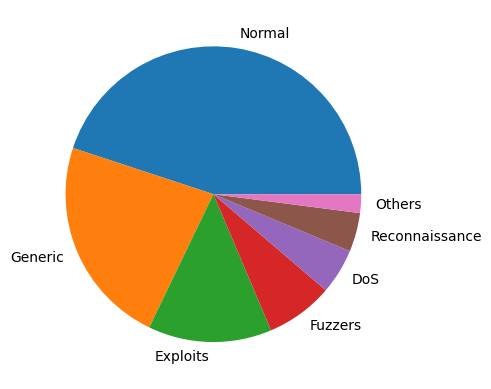

In [8]:
plt.pie(attack_values, labels=attack_values.index);

In [9]:
proto_values = train_df['proto'].value_counts()

In [10]:
others_prots = 0
others_proto_cats = []
for cat in proto_values.index:
    if proto_values[cat]/train_df.shape[0] < 0.01:
        others_proto_cats.append(cat)
        others_prots += proto_values[cat]
proto_values['Others'] = others_prots
proto_values = proto_values.drop(others_proto_cats)
proto_values

tcp       43095
udp       29418
unas       3515
arp         987
Others     5317
Name: proto, dtype: int64

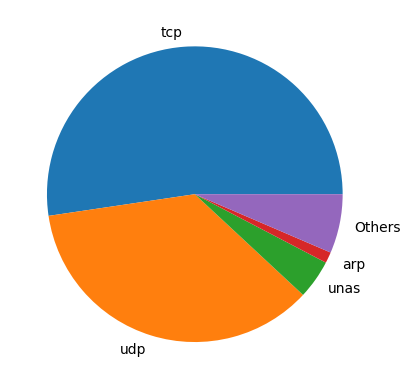

In [11]:
plt.pie(proto_values, labels=proto_values.index);

udp       21321
tcp       15247
unas       3515
Others     5249
Name: proto, dtype: int64


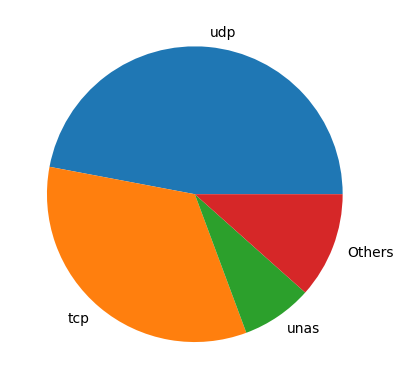

In [17]:
proto_values = train_df[train_df.label==1]['proto'].value_counts()
others_prots = 0
others_proto_cats = []
for cat in proto_values.index:
    if proto_values[cat]/train_df.shape[0] < 0.01:
        others_proto_cats.append(cat)
        others_prots += proto_values[cat]
proto_values['Others'] = others_prots
proto_values = proto_values.drop(others_proto_cats)
print(proto_values)
plt.pie(proto_values, labels=proto_values.index);

tcp       27848
udp        8097
arp         987
Others       68
Name: proto, dtype: int64


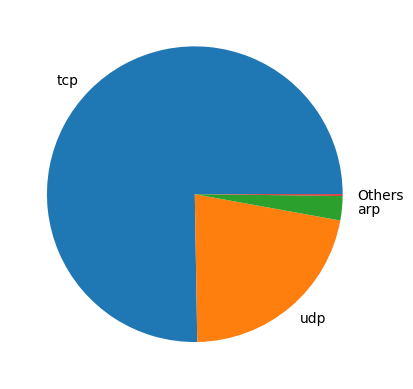

In [18]:
proto_values = train_df[train_df.label==0]['proto'].value_counts()
others_prots = 0
others_proto_cats = []
for cat in proto_values.index:
    if proto_values[cat]/train_df.shape[0] < 0.01:
        others_proto_cats.append(cat)
        others_prots += proto_values[cat]
proto_values['Others'] = others_prots
proto_values = proto_values.drop(others_proto_cats)
print(proto_values)
plt.pie(proto_values, labels=proto_values.index);

-           47153
dns         21367
http         8287
smtp         1851
ftp          1552
ftp-data     1396
Others        726
Name: service, dtype: int64


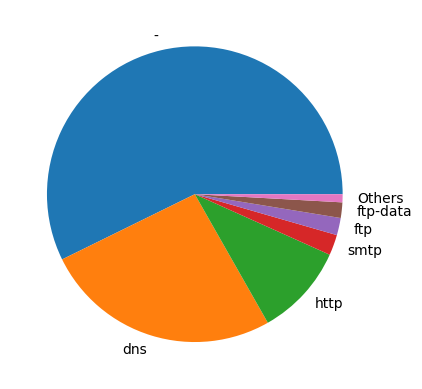

In [14]:
service_values = train_df['service'].value_counts()
others_service = 0
others_service_cats = []
for cat in service_values.index:
    if service_values[cat]/train_df.shape[0] < 0.01:
        others_service_cats.append(cat)
        others_service += service_values[cat]
service_values['Others'] = others_service
service_values = service_values.drop(others_service_cats)
print(service_values)
plt.pie(service_values, labels=service_values.index);

-         19778
dns       18299
http       4274
smtp       1216
Others     1765
Name: service, dtype: int64


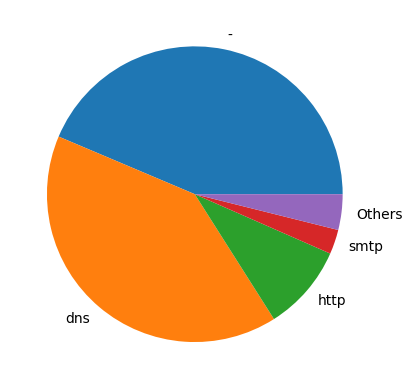

In [15]:
service_values = train_df[train_df.label==1]['service'].value_counts()
others_service = 0
others_service_cats = []
for cat in service_values.index:
    if service_values[cat]/train_df.shape[0] < 0.01:
        others_service_cats.append(cat)
        others_service += service_values[cat]
service_values['Others'] = others_service
service_values = service_values.drop(others_service_cats)
print(service_values)
plt.pie(service_values, labels=service_values.index);

-           27375
http         4013
dns          3068
ftp-data      949
Others       1595
Name: service, dtype: int64


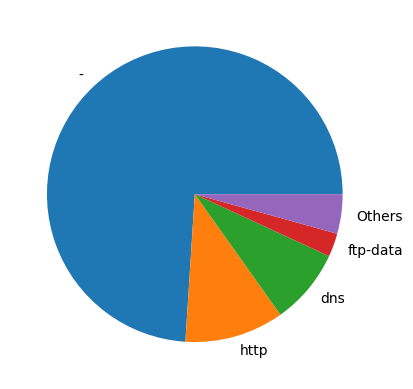

In [16]:
service_values = train_df[train_df.label==0]['service'].value_counts()
others_service = 0
others_service_cats = []
for cat in service_values.index:
    if service_values[cat]/train_df.shape[0] < 0.01:
        others_service_cats.append(cat)
        others_service += service_values[cat]
service_values['Others'] = others_service
service_values = service_values.drop(others_service_cats)
print(service_values)
plt.pie(service_values, labels=service_values.index);

Now let's see numerical features

In [27]:
train_df.is_sm_ips_ports.value_counts()

0    81416
1      916
Name: is_sm_ips_ports, dtype: int64

In [28]:
cat_features = train_df[['proto', 'service', 'state','attack_cat','label', 'is_sm_ips_ports','is_ftp_login']]
cat_features

,proto,service,state,attack_cat,label,is_sm_ips_ports,is_ftp_login
0,udp,-,INT,Normal,0,0,0
1,udp,-,INT,Normal,0,0,0
2,udp,-,INT,Normal,0,0,0
3,udp,-,INT,Normal,0,0,0
4,udp,-,INT,Normal,0,0,0
...,...,...,...,...,...,...,...
82327,udp,-,INT,Normal,0,0,0
82328,tcp,-,FIN,Normal,0,0,0
82329,arp,-,INT,Normal,0,1,0
82330,arp,-,INT,Normal,0,1,0


In [29]:
num_features = train_df.drop(cat_features.columns,axis=1)
num_features = num_features.drop('id', axis=1)
num_features

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst
0,0.000011,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,...,2,2,1,1,1,2,0,0,1,2
1,0.000008,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,...,2,2,1,1,1,2,0,0,1,2
2,0.000005,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,...,3,2,1,1,1,3,0,0,1,3
3,0.000006,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,...,3,2,2,2,1,3,0,0,2,3
4,0.000010,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,...,3,2,2,2,1,3,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,...,1,2,2,1,1,2,0,0,2,1
82328,1.106101,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,...,1,1,2,1,1,1,0,0,3,2
82329,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,1,2,1,1,1,1,0,0,1,1
82330,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,1,2,1,1,1,1,0,0,1,1


<AxesSubplot: >

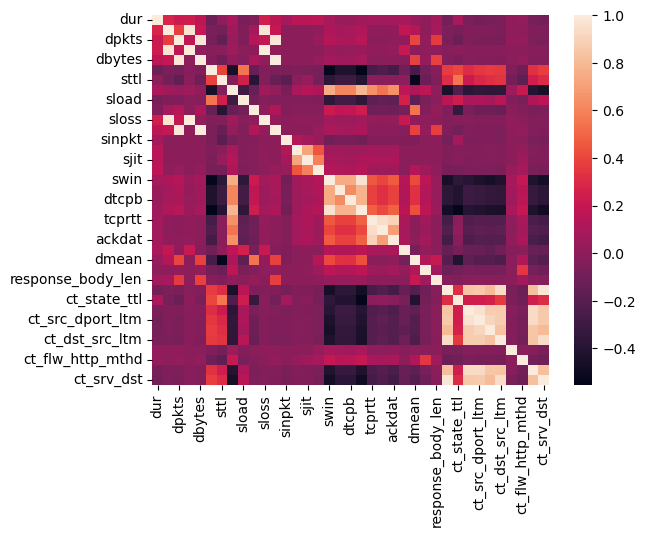

In [30]:
corr = num_features.corr()
sns.heatmap(corr)

In [31]:
corr

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst
dur,1.000000,0.280239,0.217507,0.225432,0.172492,-0.118031,-0.000986,0.090048,-0.076343,-0.047032,...,-0.088328,0.093925,-0.072591,-0.086880,-0.081637,-0.071127,0.015547,0.018879,-0.080789,-0.091253
spkts,0.280239,1.000000,0.369554,0.965750,0.198324,-0.068249,-0.092536,0.054601,-0.044194,0.074440,...,-0.058717,-0.073850,-0.047928,-0.053109,-0.055095,-0.061852,0.010423,0.000443,-0.049367,-0.058815
dpkts,0.217507,0.369554,1.000000,0.175834,0.976419,-0.083173,-0.163830,0.036483,-0.054145,0.133835,...,-0.062836,-0.122442,-0.052606,-0.062549,-0.067452,-0.075012,0.012555,0.021041,-0.057374,-0.063169
sbytes,0.225432,0.965750,0.175834,1.000000,0.010036,-0.025102,-0.017866,0.049891,-0.015228,-0.006428,...,-0.030204,-0.007311,-0.022276,-0.020586,-0.020451,-0.024065,-0.002569,-0.004626,-0.021540,-0.030049
dbytes,0.172492,0.198324,0.976419,0.010036,1.000000,-0.047978,-0.114537,0.012537,-0.031266,0.100923,...,-0.034330,-0.073023,-0.029569,-0.035335,-0.038965,-0.044048,-0.006498,0.022901,-0.033301,-0.034416
rate,-0.118031,-0.068249,-0.083173,-0.025102,-0.047978,1.000000,0.388155,-0.453913,0.550104,-0.138441,...,0.367670,0.399469,0.310987,0.345573,0.366238,0.358902,-0.049952,-0.112432,0.327563,0.370816
sttl,-0.000986,-0.092536,-0.163830,-0.017866,-0.114537,0.388155,1.000000,-0.033338,0.252901,-0.386224,...,0.311509,0.556059,0.220689,0.287568,0.315776,0.335118,-0.089897,-0.174840,0.236869,0.304131
dttl,0.090048,0.054601,0.036483,0.049891,0.012537,-0.453913,-0.033338,1.000000,-0.293939,-0.139491,...,-0.444748,-0.230182,-0.376921,-0.349865,-0.357793,-0.364181,0.050854,0.208628,-0.403289,-0.454576
sload,-0.076343,-0.044194,-0.054145,-0.015228,-0.031266,0.550104,0.252901,-0.293939,1.000000,-0.092772,...,0.158585,0.233317,0.090269,0.112361,0.083445,0.155386,-0.032464,-0.072814,0.110013,0.160250
dload,-0.047032,0.074440,0.133835,-0.006428,0.100923,-0.138441,-0.386224,-0.139491,-0.092772,1.000000,...,-0.054197,-0.332431,-0.069665,-0.112150,-0.118318,-0.131723,-0.018748,-0.041135,-0.065953,-0.059030


In [33]:
import numpy as np
threshold = 0.8
row, col = np.where((np.abs(corr) > threshold) & (np.arange(corr.shape[0])[:, None] != np.arange(corr.shape[1])))
high_correlation_pairs = [(corr.index[row[i]], corr.columns[col[i]]) for i in range(len(row))]
for pair in high_correlation_pairs:
    print(pair)

('spkts', 'sbytes')
('spkts', 'sloss')
('dpkts', 'dbytes')
('dpkts', 'dloss')
('sbytes', 'spkts')
('sbytes', 'sloss')
('dbytes', 'dpkts')
('dbytes', 'dloss')
('sloss', 'spkts')
('sloss', 'sbytes')
('dloss', 'dpkts')
('dloss', 'dbytes')
('swin', 'dwin')
('dwin', 'swin')
('tcprtt', 'synack')
('tcprtt', 'ackdat')
('synack', 'tcprtt')
('ackdat', 'tcprtt')
('ct_srv_src', 'ct_dst_ltm')
('ct_srv_src', 'ct_src_dport_ltm')
('ct_srv_src', 'ct_dst_sport_ltm')
('ct_srv_src', 'ct_dst_src_ltm')
('ct_srv_src', 'ct_src_ltm')
('ct_srv_src', 'ct_srv_dst')
('ct_dst_ltm', 'ct_srv_src')
('ct_dst_ltm', 'ct_src_dport_ltm')
('ct_dst_ltm', 'ct_dst_sport_ltm')
('ct_dst_ltm', 'ct_dst_src_ltm')
('ct_dst_ltm', 'ct_src_ltm')
('ct_dst_ltm', 'ct_srv_dst')
('ct_src_dport_ltm', 'ct_srv_src')
('ct_src_dport_ltm', 'ct_dst_ltm')
('ct_src_dport_ltm', 'ct_dst_sport_ltm')
('ct_src_dport_ltm', 'ct_dst_src_ltm')
('ct_src_dport_ltm', 'ct_src_ltm')
('ct_src_dport_ltm', 'ct_srv_dst')
('ct_dst_sport_ltm', 'ct_srv_src')
('ct_dst_sp